# Basic of statistics I

Any measurement is subject to uncertainty, which might be negibible or not. This can apply to counting votes in race for presidency or star counts. Statistics deals with these uncertainties trying to make out the most of the data. That is, it is a descipline which concerns the collection, organization, analysis, interpretation and presentation of data. Before we dive in detail, let's play a bit with the data. Here we will be using _Python_, and in particular, _scipy.stats_ module. Note that this is just one of the options available, and you could, in fact, even implement same functionality yourself. Moreover, _scipy.stats_ is also not optimal solution in many cases, however, it follows consistent syntax, so we will use it here. Other packages of interest are _astroML_ and _scikits.statsmodels_ (not covered here). So, using a python module always starts with importing it. You can then explore various functionality by looking through documentation. Here I import also _pylab_ module for plotting and _numpy_ module to work with arrays easily.

## Basic descriptive statistics 

As mentioned in the lecture, descriptive statistics deals with. Well, describing the data! This could be through histograms, or some "descriptive numbers" such as _mean_, _median_, _mode_, _variance_, etc. To illustrate this point, let us generate some data. In this case N points drawn from two a normal distribution. Play with N, loc, scale parameters to see how it affects the results. Normal distribution is pretty important!

In [1]:
# We want to generate some large sample of random numbers
import scipy.stats as s
import pylab as plt
from numpy import *

N=10000
# these are our trials. Play with N, loc, scale to see how it affects the result. 
trials = s.norm(loc=15,scale=2).rvs(N)

Now we can print out some basic descriptive numbers for this set of random numbers we have generated

In [2]:
print("Mean over sample is %.4f"%mean(trials))
print("Median over sample is %.4f"%median(trials))
print("Standard deviation over sample is %.4f"%std(trials))
print("Variance over sample is %.1f"%var(trials))


Mean over sample is 15.0044
Median over sample is 15.0043
Standard deviation over sample is 2.0137
Variance over sample is 4.1


We can also visualize what we got. That's also part of what descriptivie statistics is about. One way to do that is plot histogram. Luckily, there's a function for that in pylab. This function not only plots histogram (i.e. counting how many times each value occured in the sample), 
but also calculates it and returns as x,y vectors. You can re-use those later if needed. Here I just assign result to variable to suppress printing

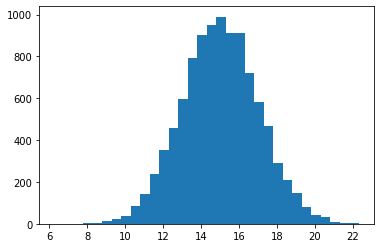

In [3]:
histogram_data = plt.hist(trials,32)

We can now also play with the data to characterize it. For instance, we can calculate mean and standard deviations over sample (mean and std functions), or pecentiles, i.e. fraction of values in the sample which are more/less than X% of all points in the sample

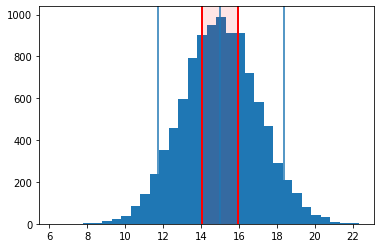

In [4]:
histogram_data = plt.hist(trials,32)
plt.axvline(mean(trials))
plt.axvspan(mean(trials)-std(trials)/2.,mean(trials)+std(trials)/2.,alpha=0.1,fc='r') # the range shows standard deviation over the sample
plt.axvline(percentile(trials,5)) # 5% of values in the sample are below this line
plt.axvline(percentile(trials,95)) # 95% of values in the sample are below this line
plt.axvline(percentile(trials,68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation
plt.axvline(percentile(trials,100-68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation


it's interesting to note 68 percent corresponds to 1 standard deviation, i.e. if you know mean and standard deviation over sample, you know that 68% of all values are below mean+std, and 100-68=32% are below mean-std.
This is already a direct link to *probability*. For large-enough samples you can calculate this directly, but if you know underlying distribution, you can also do it for small samples, which is nice.

Note, however, that std/percentile relation above applies only to normal distribution, i.e. will not be satisfied if you have any other distribution of your random variable even if you can still calculate mean and standard deviation!

This point is illustrated below, i.e. we start to complicate things a bit. Obviously, distributions must not always be normal. For instance, you can have a situation when two samples mix. Mean value is now unrelated to either of the two underlying distributions, and standard deviation does not tell you about percentile of points below/above.

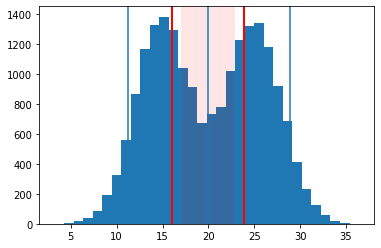

In [5]:
N=10000
# Here we also use concatenate function to glue two sets in one
trials = concatenate((s.norm(loc=15,scale=3).rvs(N),s.norm(loc=25,scale=3).rvs(N)))
# Now we can visualize what we got. One way to do that is plot histogram. Luckily, there's a function for that in pylab
histogram_data = plt.hist(trials,32)
# this function not only plots histogram (i.e. counting how many times each value occured in the sample), 
# but also calculates it and returns as x,y vectors. You can re-use those later if needed
plt.axvline(mean(trials))
plt.axvspan(mean(trials)-std(trials)/2.,mean(trials)+std(trials)/2.,alpha=0.1,fc='r') # the range shows standard deviation over the sample
plt.axvline(percentile(trials,5)) # 5% of values in the sample are below this line
plt.axvline(percentile(trials,95)) # 95% of values in the sample are below this line
plt.axvline(percentile(trials,68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation
plt.axvline(percentile(trials,100-68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation



Mind that there are many kinds of distributions you can encounter. Another common one is lognormal distribution, i.e. when $\log{x}$ is distributed normally. This is an exmaple of assymetric distributions where mean value is also a bad indicative of "most probable" value. Instead median appears to be a better approximation (although not ideal). In general, there's no universal magic number to characterize given distribution of a random variable, so ideally before starting any statistical exploration of the data you already need to know what to expect from it and constantly check whether observations agree with prior assumptions. Keep in mind that this can be tricky as visualization of data also affects your perception of it. For instance, below we have two histograms for the same datasets with differently defined bins, and those look quite different. Note that appropriate binning (i.e. with bins equally spaced in log-space, yellow line) makes it clear that median is indeed a better approximation of the most probable value in this case.

[]

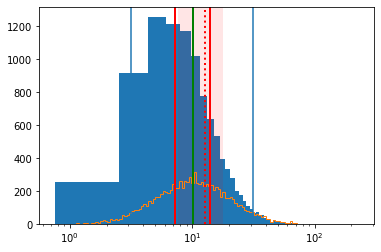

In [6]:
N=10000
# Here we also use concatenate function to glue two sets in one
trials = 10**s.norm(loc=1,scale=0.3).rvs(N)
# Now we can visualize what we got. One way to do that is plot histogram. Luckily, there's a function for that in pylab
histogram_data = plt.hist(trials,128)
different_bins = plt.hist(trials,bins=logspace(log10(min(trials)),log10(max(trials)),128),histtype='step')
# this function not only plots histogram (i.e. counting how many times each value occured in the sample), 
# but also calculates it and returns as x,y vectors. You can re-use those later if needed
plt.axvline(mean(trials),c='r',lw=2,ls='dotted')
plt.axvspan(mean(trials)-std(trials)/2.,mean(trials)+std(trials)/2.,alpha=0.1,fc='r') # the range shows standard deviation over the sample
plt.axvline(percentile(trials,5)) # 5% of values in the sample are below this line
plt.axvline(percentile(trials,95)) # 95% of values in the sample are below this line
plt.axvline(percentile(trials,68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation
plt.axvline(percentile(trials,100-68),lw=2,c='r') # it's interesting to note 68 percent corresponds to 1 standard deviation
plt.axvline(median(trials),c='g',lw=2)
plt.semilogx()


Now, let's try to do something different. Let's generate trials from single normal distribution again.
That's kind of distribution you most often get when measuring things with random errors. Of course, we can still calculate mean and standard deviation over generated distribution.

In [7]:
trials = s.norm(loc=15,scale=3).rvs(N)
print(mean(trials),std(trials))
# Those are the loc and scale parameters for scipy.stats.norm (here n). Close enough!

14.941757072576424 2.9856080814727135


But it's not always like that. Lets now try to play with N and see how it affects the result
These are number of "measurements" in our sample. We use log-spaced points because things stop changing at large Ns

[     10      14      22      32      48      72     108     161     239
     356     529     788    1172    1743    2592    3856    5736    8531
   12689   18873   28072   41753   62101   92367  137382  204335  303919
  452035  672335 1000000]


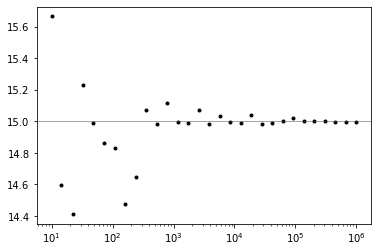

In [8]:
Ns = logspace(1,6,30).astype(int)
print(Ns)
# Those are the "input" parameters for our distribution
loc,scale=15,3
# And now we can draw N samples (which changes from 10 to 1000000) and see how mean value over sample agrees with input
means = [mean(s.norm(loc=loc,scale=scale).rvs(N)) for N in Ns]
plt.semilogx(Ns,means,'k.')
plt.axhline(loc,c='r',lw=0.5)


You see that only for reasonably large Ns we get value close to the input consistently. That's because there are always statistical fluctuations which can bias our estimate of the mean. This can happen obviously also to other numbers we estimate based on the data. Of course, in ideal world we would just take ***more data***, but unfortunately it's not always possible and we have to deal with what we have. The goals of statistical analysis are, therefore
* to calculate mean (or other parameter characterizing distribution) based on available data (*inference*)
* estimate what is the uncertainty for your calculation (*confidence*)

how to achieve these goals is a long and complex story (many books are written about that), but for us it is important to understand, that similarly to random numbers themselves (i.e. our trials drawn from pre-defined distribution), mean of those numbers is also a random quantity, so what we can do is to make a histogram of means too. Of course, if we can repeat the experiment many times. Let us do that now for single N. Obviously, the means you calculate are random, i.e. you can apply same descriptive statistics etc. If you know distribution of this random variable (and there's math and assumptions for that). In this way you can estimate aposteriori distribution of your errors and thus assess probability that your estimate is correct.

14.507888693031873 15.491516320029028


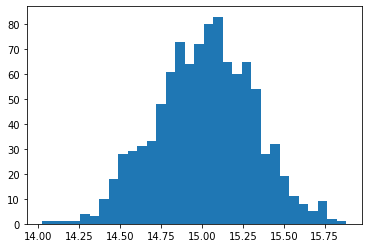

In [9]:
means = [mean(s.norm(loc=loc,scale=scale).rvs(100)) for i in range(1000)]
meanshist = plt.hist(means,32)
print(percentile(means,5),percentile(means,95))

You can also calculate confidence intervals for this variable, i.e. you can say somehting like _"for sample of 100 points drawn from a normal distribution I can calculate mean value. Furthermore, my estimate of the mean will lie between 14.52 and 15.48 in 90% of cases"_ where the nubers come from calculation above. Again, it is often not possible to do such calculation directly, and that's where statistics comes into play. Statistics studies all kinds of distribution like that and provides means of estimating of statistical properties of the sample, and assessing accuracy of those estimates (under certain assumptions). Obviously, taking care that the assumptions used are justified are your responsibility as a scientist, so you need to understand what you are doing. That's why also astronomers need to learn at least basics of statistics.

# Probability and density functions
As discussed in the lecture, probability defines density of possible experiment outcomes in outcome space. In practice, this distribution is most often approximated by one of the fundamental distributions invented by nature or mathematicians. In astrophysics, most important distributions are arguably _normal_, _poisson_, and $\chi^2$ distributions (although this depends on area of research). Those were _briefly_ mentioned in the lecture, please see MSMA book for more detail. Here I would like just briefly illustrate how you could play with those (and many others).

In [10]:
import scipy.stats as s
import pylab as plt
from numpy import *

Module implements many distributions (basically every one you could ever need). For each distribution there are several standard methods available such as _.rvs_ (generate numbers), _.pmf/.pdf_ (probability mass/density functions), etc. Meaning of the arguments to be passed (if any) may be different depending on particular distribution but 1) usually rather intuitive, 2) can be looked-up in the documentation. There are also some methods specific to continous/discrete distributions, so in any case you'll need to know your distribution before using _scipy_ implementation! To start things off, let's play a bit with _Bernoulli_ distribution (coin toss). That's initialized with probability for the two choices. We use 0.5, i.e. _fair coint_.

In [11]:
bernoulli = s.bernoulli(0.5)

Now let's toss the coin 1000 times (that is, generate _random numbers_ from pre-defined distribution), and make a histogram of the results

(array([479.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 521.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

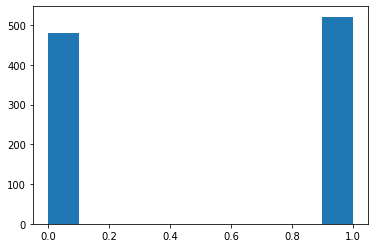

In [12]:
plt.hist(bernoulli.rvs(1000))

as you can see, the number of heads/tails is about the same, as expected. Now let's access some of the basic methods of the distribution object. For instance, let's plot the probability mass function (pmf)

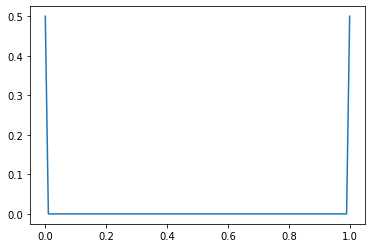

In [13]:
x = plt.linspace(0,1,100)
plt.plot(x,bernoulli.pmf(x))

You see that the probability to draw 0 or 1 from the sample is equal, and equals 0.5 as expected. If we do the same for _unfair coin_, the plot will look different. Note that you can create distributions objects on the fly.

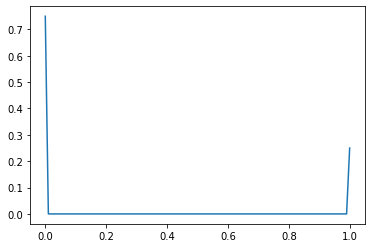

In [14]:
plt.plot(x,s.bernoulli(0.25).pmf(x))

other essential methods common to most distributions in _scipy_ are _.sf_, _.cdf_, please look up their meaning yourself if that's not obvious.

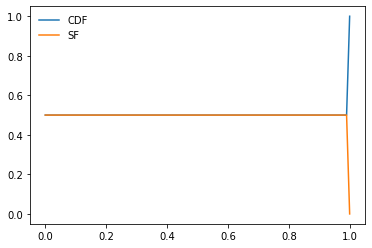

In [15]:
plt.plot(x,bernoulli.cdf(x),label='CDF')
plt.plot(x,bernoulli.sf(x),label='SF')
plt.legend(frameon=False)

Of course, you can access other distributions in a similar way. Let's do, for instance same basic plots for normal distribution. Note that I redifined _x_ here. Why?

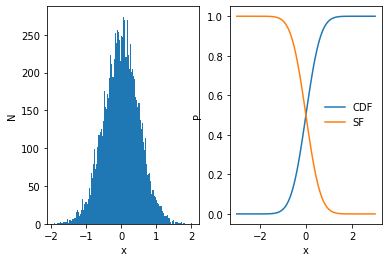

In [16]:
normal = s.norm(loc=0,scale=0.5)
plt.subplot(121)
plt.hist(normal.rvs(10000),128)
plt.xlabel('x')
plt.ylabel('N')
plt.subplot(122)
x = plt.linspace(-3,3,100)
plt.plot(x,normal.cdf(x),label='CDF')
plt.plot(x,normal.sf(x),label='SF')
plt.xlabel('x')
plt.ylabel('P')
plt.legend(frameon=False)

as you have probably guessed, _cdf_ and _sf=1-cdf_ are _cumulative distribution function_ and _survival functions_ for the distributions. These are kind of useful if you want to calculate probability that a given number belongs to your distribution: left (probability to draw number less than x from your distribution); right (same, but greater than x), and two-tailed tests (basically probability that x is not coming from your distribution).

In [17]:
x = 1.38
print("left-tailed p-value %.4f"%normal.cdf(x))
print("right-tailed p-value %.4f"%normal.sf(x))
print("two-tailed p-value %.4f"%(2.0*(1.0-normal.cdf(x))))

left-tailed p-value 0.9971
right-tailed p-value 0.0029
two-tailed p-value 0.0058


## Limit theorems
Obviously, the most important one is the [CLT](https://en.wikipedia.org/wiki/Central_limit_theorem), which states that sum of independent variables with finite variance (or their mean) follows normal distribution.  We can verify it directly with whatever distribution we can come up with. Let's do it for _uniform_ distribution first (just because we have not discussed it yet). To do that, let's generate a bunch of of uniformly distributed numbers, calculate their mean and compare with normal distribution.

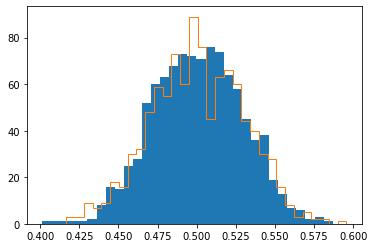

In [18]:
random_numbers = [mean(s.uniform(0,1).rvs(100)) for i in range(1000)]
rr = plt.hist(random_numbers,32)
true_normal_random_numbers = s.norm(loc=mean(random_numbers),scale=std(random_numbers)).rvs(len(random_numbers))
rr = plt.hist(true_normal_random_numbers,histtype='step',bins=32)


Another way to compre them (besides histograms) is to use a non-parametric 2 sample test, like Kolmogorov-Smirnov test

In [19]:
s.ks_2samp(random_numbers,true_normal_random_numbers)

KstestResult(statistic=0.024, pvalue=0.9357699014782725)

The p-value is rather large, so we can reject null hypothesis that distributions are different

We've mentioned in the lecture that _binomial_ distribution has two important limits, i.e. reduces to poisson distribuiton for _np=const_ and _normal_ distribution for _p=const_ (for large _n_ in both cases). So let us verify that! First, let us consider _Poisson_ limit. Here _n_ must be large, and _np~0_. Try to play with _n_ and _p_ to see where approximation breaks! Note that here we use _logpmf_ rather that _pmf_ method as it is more accurate.

expected rate is 1.000


Text(0, 0.5, 'Log(PMF)')

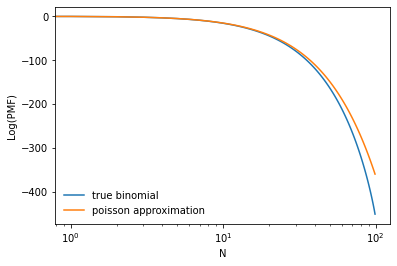

In [20]:
n,p = 100,0.01
poisson_rate = n*p 
print("expected rate is %.3f"%poisson_rate)
plt.plot(range(n),s.binom(n,p).logpmf(range(n)),label='true binomial')
plt.plot(range(n),s.poisson(n*p).logpmf(range(n)),label='poisson approximation')
plt.semilogx()
plt.legend(frameon=False)
plt.xlabel('N')
plt.ylabel('Log(PMF)')



Now, let's move to the other limit, i.e. normal distribution. 

approximate binomial with normal with mu=50.0, sigma=5.0


Text(0, 0.5, 'Log(PMF/PDF)')

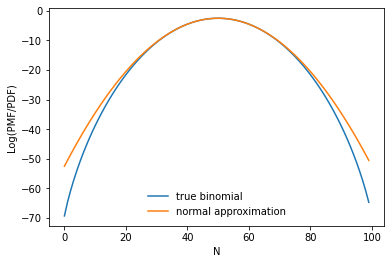

In [21]:
n,p = 100,0.5
mu, sigma = n*p, sqrt(n*p*(1-p))
print("approximate binomial with normal with mu=%.1f, sigma=%.1f"%(mu,sigma))
plt.plot(range(n),s.binom(n,p).logpmf(range(n)),label='true binomial')
plt.plot(range(n),s.norm(loc=mu,scale=sigma).logpdf(range(n)),label='normal approximation')
plt.legend(frameon=False)
plt.xlabel('N')
plt.ylabel('Log(PMF/PDF)')



# Concepts of statistical inference
Statistical inference is by definition the process of using data analysis to deduce properties of an underlying distribution of probability. Inferential statistical analysis normally consists of two steps, i.e. deducing the population properties to formulate a hypothesis, and then testing it. We touched already both issues, i.e. when discussing descriptive statistics (means, percentiles). This topic is, however, much richer, and we can only briefly cover it in the course.


## Fitting for distribution parameters
As we discussed above, for normal distribution estimation of parameters is trivial (i.e. mean matches arithmetical mean etc). That's not always the case! Many _scipy.stats_ distributions also have _fit_ method to estimate parameters of a distribution based on a sample of data. Please refer to documentation if you need to understand how this is implemented in each particular case. From practical perspective, see example below:

In [22]:
loc, scale = 3, 0.1
random_numbers = s.norm(loc=loc,scale=scale).rvs(10) # generate 100 random numbers with mean of 3 and std of 2
locf, scalef = s.norm.fit(random_numbers) # fit for distribution parameters
print("Input parameters mean=%.4f, std=%.4f"%(loc,scale)) # print our input parameters
print("Best-fit parameters using fit method mean=%.4f, std=%.4f"%(locf,scalef)) # print best-fit parameters
print("Simply mean/std calculated directly mean=%.4f, std=%.4f"%(plt.mean(random_numbers),plt.std(random_numbers)))# and directly calculated mean/std


Input parameters mean=3.0000, std=0.1000
Best-fit parameters using fit method mean=2.9677, std=0.0893
Simply mean/std calculated directly mean=2.9677, std=0.0893


Note that for normal distribution the fit method is actually not that useful because the mean/std calculated in a standard way are not biased for this distribution. However, this might not be the case for heavy-tailed distributions, so be aware that such method exist (but not for all distributions!)

## Comparing distributions, statistical tests
One may also question whether it is probable that a point (or set of points) is consistent with some model distribution, i.e. it is probable to get data from some assumed model. We had an example of such quesition above, i.e. when discussing percentiles. That is, for single point you can just take _pdf_ of your model distribution and calculate probability to get observed point considering this _pdf_. The situation gets more complex when more points are involved. In essence, you need to assess probability that drawing _all_ observed points is probable, i.e. test _hypothesis_ that all those points come from the same distribution. This is effectively done for two distributions (i.e. sample of model predictions vs sample of observed points), and such tests are usually called _statistical tests_. One shall be aware that there are two families of such tests: non-parametric and parametric. The difference is that for parametric tests additional restrictions (normally dictated by nature of studied phenomenon) are imposed. The basic idea is, however, the same in both cases, i.e. calculate probability that data sample is drawn from a given distribution or that two (or more) samples are drawn from the same distribution. Two commonly used tests are Kolmogorov-Smirnov (non-parametric) and Shapiro-Wilk (normality) tests. These are implemented in scipy, so let's try to apply those to some simulated data.

In [23]:
loc,scale,N = 0,1,500
random_numbers = s.norm(loc=loc,scale=scale).rvs(N)
print("p-value (reject hypothesis of normal distribution) from Shapiro-Wilk test for normality",s.shapiro(random_numbers).pvalue)
print("p-value (reject hypothesis of normal distribution) from Kolmogorov-Smirronv test (here for normal distribution)",s.kstest(random_numbers,'norm').pvalue)



p-value (reject hypothesis of normal distribution) from Shapiro-Wilk test for normality 0.3357706367969513
p-value (reject hypothesis of normal distribution) from Kolmogorov-Smirronv test (here for normal distribution) 0.26806797281176353


Comparing random data is hard, and there's an entire statistical field devoted to that. You just need to remember that commonly used statistical tests require some caution in interpretation of their results. For instance, you could check for distribution of _statistics_ (not _p-value_!) returned by the test for simulated data, and determine true _p-value_ under your assumptions. This would allow to calculate _critical levels_ for statistic corresponding to certain _confidence_ levels separating hypotheses. This is done, for instance, in _Andreson-Darling_ test. This test is a modification of KS-test giving more weight to tails of the distribution. Note that critical levels are calculated for **completely specified distribution (i.e. $\mu=0, \sigma=1$ by default)** whereas Wilk test tests against *any* normal distribution. The later test is considered most powerful for normal distributions, btw, but you need to calculate critical levels via simulations (again, for completely specified distribution). Let us first calculate results for SW and KS tests

Null hypothesis (here normal distribution) can be rejected if test statistic s=0.231 exceeds some critical level (here from 0.6 to 1.1)


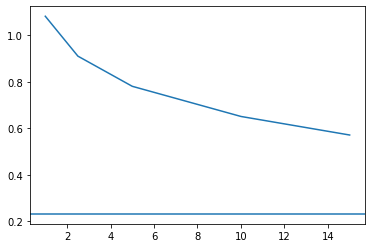

In [24]:
anderson = s.anderson(random_numbers)
plt.plot(anderson.significance_level,anderson.critical_values)
plt.axhline(anderson.statistic)
print("Null hypothesis (here normal distribution) can be rejected if test statistic s=%.3f exceeds some critical level (here from %.1f to %.1f)"%(anderson.statistic,anderson.critical_values.min(),anderson.critical_values.max()))

you see that _Anderson_ results appears to be most consistent with the reality (i.e. we test random numbers drawn from a random distribution vs assumption that they are indeed drawn normal and always get a confirmation), whereas KS and Wilk give mixed results. That's however, just because we test against this particular distribution. To get similar result with Shapiro-Wilk, you would need to run a series of simulations determining critical levels.

### Non-parametric and two-sample tests

The tests mentioned above are used to test whether random variable belongs to a particular distribution defined, i.e. by some parameters. There are, however, also non-parametric tests which test whether a variable belongs to some kind of distribution (i.e. *normal in general* rather than normal with zero mean an sigma of one), or even test two samples are drawn from same distributions. Such *non-parametric* tests are more generic, but typically less powerfull (you get what you pay for), but still can be incredibly useful. The most-commonly known is *Kolmogorov-Smirnov* test, or simply KS-test, which is also implemented in *scipy*. You can use it not only to test whether sample matches some template distribution, but also whether two samples are the same (p-value)

In [25]:
import scipy.stats

sample1 = random.normal(loc=0,scale=1,size=100)
sample2 = random.normal(loc=0,scale=1,size=100)
s.stats.ks_2samp(sample1,sample2)

KstestResult(statistic=0.06, pvalue=0.9942356257694902)

In [26]:
sample1 = random.normal(loc=100,scale=10,size=100)
sample2 = random.normal(loc=0,scale=1,size=100)
scipy.stats.ks_2samp(sample1,sample2)

KstestResult(statistic=1.0, pvalue=2.2087606931995054e-59)

Other examples are Anderson-Darling test (variant), Siegel-Turkey test, Sign test, Wilcoxon signed-rank test, etc. Just read the wiki on non-parametric tests. For us of special importance is poisson distribution, so I'd like to highlight poisson e-test (implemented as *poisson_etest* module). That's useful to compare rates of two poisson distributions, for instance source/background in image or lightcurve. Takes number of events and exposure (or area of an image) as input. Let's assume that you detect 11 photons within 3 seconds, and then 10 photons within 6 seconds, how probable is that excess in first interval is simply by chance?

In [27]:
import poisson_etest
print("probability of excess by chance %e"%poisson_etest.poisson_etest(11,10,3,10,alternative='greater'))

probability of excess by chance 2.132363e-03


Note that in principle you can define multiple intervals where you compute rates to search i.e. for possible bursts in lightcurve or presence of point sources in an image. That is, rate during a burst (or when window matches a source) shall be significantly different with respect to the rest of lightcurve/image

## $\chi^2$ statistics, fitting and goodness of fit
As was mentioned in the lecture, $\chi^2$ statistics is one of the most important statisits we will touch, and perhaps most commonly used _goodness of fit_ test. Let's illustrate how it can be used in practical terms. Let's first consider the simplest case, i.e. assume that our model is a constant and we want to determine it from N observations. Here we assume that our error for individual measurement is known, or at least estimated. 

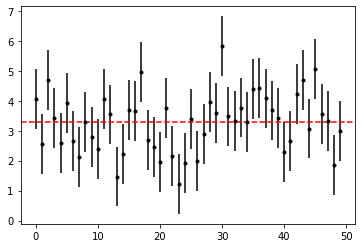

In [28]:
n = arange(50)
constant_value = 3.3
random_data = s.norm(loc=constant_value,scale=1).rvs(len(n))
random_error = 1.0*ones_like(random_data)
plt.errorbar(n,random_data,random_error,fmt='k.')
plt.axhline(constant_value, ls='dashed',c='r')

Now, our model is a constant, and value of this constant in our particular case, and that's the expected mean for each random point in our distribution. Remember, we assume that in the end our model describes everything except of random deviations!. We can, therefore, just plug our _constat_value_  as $\mu$ in $\chi^2$ definition.
$$
\chi^2 = \sum _{i=1}^{k}\left({\frac {X_{i}-\mu _{i}}{\sigma _{i}}}\right)^{2}
$$
which then becomes function of assumed _constant_value_=$\mu$ and thus can be used to find that value. Indeed, our final model shall describe the data with exception of intrincic variance which will result in some residual irreducible statistics value, so minimal value of $\chi^2$ corresponds to the best model. Finding of the minimal $\chi^2$ value can be done analytically for linear models ([_linear least squares_](https://en.wikipedia.org/wiki/Linear_least_squares)), but here let's try to do that numerically, just to check what happens with $\chi^2$ when we move away from the "best fit". Here we assume that $\sigma$ corresponds to estimate of errors for individual points.


Text(0, 0.5, '$\\chi^2$ value for assumed constant')

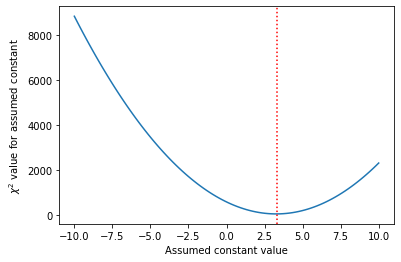

In [29]:
chi2 = lambda searched_constant: sum(((random_data-searched_constant)/random_error)**2)
constants_to_try = linspace(-10,10,100)
plt.plot(constants_to_try,[chi2(x) for x in constants_to_try])
plt.axvline(constant_value, ls='dotted',c='r')
plt.xlabel('Assumed constant value')
plt.ylabel('$\chi^2$ value for assumed constant')

Indeed we see that the $\chi^2$ statistics is minimal around expected value (which was used to simulate the data), and increases as we move away from it. This allows us to find the value of our model parameter by minimizing $\chi^2$. In practice, it is most often done numerically, for instance using one of the minimization methods available in _scipy.optimize_ module. To minimize $\chi^2$ function we could use, i.e. 

In [30]:
import scipy.optimize
best_fit_value = scipy.optimize.fmin(lambda p: sum(((random_data-p[0])/random_error)**2),[5])
print("best-fit constant value: %.3f"%best_fit_value)
print("Residual statistics = %.1f"%chi2(best_fit_value))

Optimization terminated successfully.
         Current function value: 47.760346
         Iterations: 17
         Function evaluations: 34
best-fit constant value: 3.268
Residual statistics = 47.8


Here we can observe two things: 1) $\chi^2_{min}$>0 and 2) our result does not match precisely the input used to simulate the data. Is there anything wrong? Is our fit bad? Well, those questions are hard to answer!

Let's answer 1) first. Remember that mean expected value of $\chi^2$ distribution is $k$. We definitively have more than one point, so what is our number of degrees of freedom? Generally that's just number of points minus number of free parameters, so we have 

In [31]:
k = len(random_data) - 1
print("Number of degrees of freedom is %d"%k)

Number of degrees of freedom is 49


Which is actually the expected value of our $\chi^2$ statistics. The fact that we got lower value means that our model describes the data _better_ than could be anticipated based on assumed errors of individual points. In practice, so-called reduced $\chi^2_{red}=\chi^2/k$ is often used. Considering that mean value of $<\chi^2>=k$ for a good fit when all of residual variance is due to random fluctuations of individual points you would expect $\chi^2_{red}\sim1$. And we have

In [32]:
print("Chi2 reduced=%.3f"%(chi2(best_fit_value)/k))

Chi2 reduced=0.975


that is less than one, i.e. residual variance of our model is even less than one could expect based on expected random fluctuations of individual points (i.e. their uncertainties). Does this mean that $\chi^2_{red}=1$ and thus our fit is good? Not necessary! And that is ***very important point***!

First of all, imagine that you have an **overly complex** model with lots of free parameters. Ultimately, you can just have a dedicated constant for each of your points, and then you arrive at $\chi^2=0$ or $\chi^2_{red}=0$. Good? Not really: you effectively find a model which produces zero residual variance, but also zero additional information as effectively you have just substituted your data with your model parameters. Our goal was to describe a distribution with some quantity, not convert to another distribution!
Another limiting case is when you over-estimate uncertainties for individual points. Imagine that you have very large $\sigma_i$, this will also give $\chi^2=0$, i.e. also not what we want. Obviously, intermediate cases are also possible (i.e. slight over-estimation of errors, or slight over-complexity of the model). 
So, besides finding a best-fit value of the constant and corresponding $\chi^2$, we must to come up with some procedure to assess _goodness of fit_

### Goodness of fit
One question you can immideately ask is _"Is my final $\chi^2$ statistic value consistent with what I'd expect for $\chi^2$ distribution?"_. Indeed, we know _pdf_ for that distribution and thus could calculate probability (_p-value_) that our best $\chi^2$ indeed belongs to standard distribution(or in this case less than we could expect).  Let's use _scipy.stats_ again

In [33]:
best_chi = chi2(best_fit_value)
print("chi_red=%.3f, p-value=%.3f"%(best_chi/k,scipy.stats.chi2(k).sf(best_chi)))

chi_red=0.975, p-value=0.523


This basically tells us that if we would simulate data many times in 100*p-value*% of the cases the result would be worse than we got. If that number is not too small we can, in principle, consider our fit as ***good in a sense that the residuals to the best fit model are consistent with being randomly distributed around expected errors***.
Moreover, you can impose a threshold on p-value, let's say 90% or 0.9, and say that "my fit is good if p-value is less than 0.9". The value of 0.9 or 90% is then called ***confidence level***. In principle, similar approach can be used to compare two models with different numbe of parameters (for instance, constant an a linear fit), which results in a different number of degrees of freedom and thus p-values. This is, however, a separate topic we will touch later. Here I just want to mention terms _BIC_, _AIC_ and _nested models_ as a teaser. 
For now, it is more important for us to realize that concept of confidence levels also allows us to estimate *uncertainties for our estimated parameters.* 

***Remember, however, that before doing anything with your fit (interpreting results, finding confidence intervals etc) you need to make sure that your fit is good!***

## Confidence intervals for model parameters
We know that our lowest $\chi^2$ corresponds to certain value of our model parameter(s), and changing their values increases variance of residuals and $\chi^2$ value. At some point they will become so large that there's no way to explain that with random fluctuations. How large? Well, that we can estimate knowing the _pdf_ of our distribution. Which distribution btw? In particular, how many degrees of freedom we need to assume for $\chi^2$ if we vary just one parameter with everything else constant? The answer is 1, obviously. Lets calculate maximal $\Delta\chi^2$ for which at least *p_crit* chance remains to obtain it by chance. First graphically

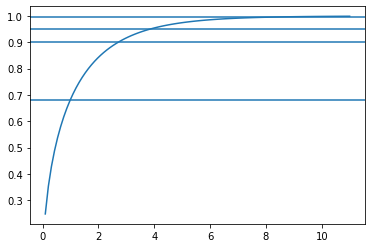

In [34]:
chi_1 = s.chi2(1)
p_crit = [0.68,0.9,0.95,0.997] # These are standard levels, more on that later
trial_dchi = linspace(0.1,11,100)
plt.plot(trial_dchi,1-chi_1.sf(trial_dchi))
[plt.axhline(x) for x in p_crit]

Here _sf_=1-_cdf_ - is _survival function_ which tells you the remaining probability in the right tail of the distribution. In analytical calculations _cdf_ (i.e. _cumulative density function_ = probability in the left tail) is normally used, however, numerically _sf_ is more accurate for many distributions, so is used internally in _scipy.stats_. It also has a nice "anti-function", i.e. _.isf_ which returns value of statistics for given probability (also available for other distributions). This can be used to estimate numerically the critical $\chi^2$ values.

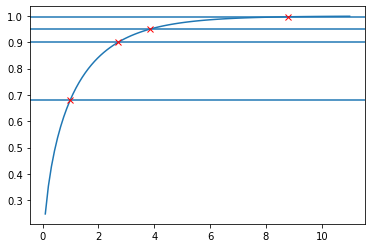

In [35]:
delta_chi_crit = chi_1.isf(1.0-array(p_crit))
plt.plot(trial_dchi,1-chi_1.sf(trial_dchi))
[plt.axhline(x) for x in p_crit]
plt.plot(delta_chi_crit,p_crit,'rx')

You may ask where the weird values for *p_crit* come from. Well, it's a mix of typically used values. 0.9 and 0.95 obviously correspond to 90 and 95% probability, but the other two are related to normal distribution, i.e. correspond probability to fall between 1 and 3 $\sigma$ from the mean respectively. 

In [36]:
print("probabilities corresponding to 1, 3 sigma",1-2.0*(1.0-s.norm.cdf([1,3]))) # 2.0 is needed to account for both tails, and 1-2.0xx to get what's between tails

probabilities corresponding to 1, 3 sigma [0.68268949 0.9973002 ]


So, when you are hearing significant at X $\sigma$ this means that it is significant at confidence level defined by corresponding probability. There are pre-calculated tables for those probabilities, and you can always calculate them yourself, but most commonly used values are 1,3 and 5 or 6 $\sigma$ (depending on the field). Generally only 5/6 are considered true detection (false alarm probability $\sim3\times10^{-7}$), althoug again that is subjective.


Now we re-visit the plot of $\chi^2$ as function of constant value (i.e. our parameter of interest). We now know that changes of $\chi^2$ smaller than critical delta are not important with probability equal to our confidence level, and thus also changes of the constant value causing such small changes in $\chi^2$ are not important. That is, we can estimate _uncertainty for the parameter of interest_ at given _confidence level_. This method of estimating uncertainties is called ***projection*** because you're essentially measuring projection of the slice of the $\chi^2$ space at given level to axis representing parameter of interest. 

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 12
         Function evaluations: 24
Best-fit constant value is 3.27+/-0.36 (99.00 percent confidence level)


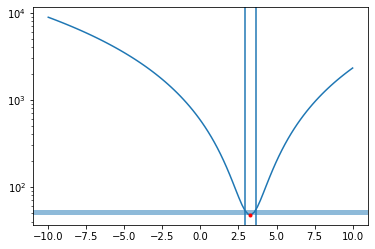

In [37]:
confidence_level=.99
critical_chi = chi_1.isf(1.0-array(confidence_level))
chibest = chi2(best_fit_value)
# our projection plot
plt.plot(constants_to_try,[chi2(x) for x in constants_to_try])
# best value of parameter and best chi2 
plt.plot([best_fit_value],[chibest],'r.')
# now let's show our confidence interval
plt.axhspan(chibest,chibest+critical_chi,alpha=0.5)
# to make this small span visible
plt.semilogy()
# and finally, let's find our confidence interval for parameter. The idea is to use fmin and brute-force optimization
fitness_function = lambda p: (chi2(p[0])-(chibest+critical_chi))**2
upper_bound = scipy.optimize.fmin(fitness_function, [best_fit_value+0.5])
lower_bound = scipy.optimize.fmin(fitness_function, [best_fit_value-0.5])
plt.axvline(upper_bound)
plt.axvline(lower_bound)
final_error = 0.5*((upper_bound-best_fit_value)+(best_fit_value-lower_bound))
print("Best-fit constant value is %.2f+/-%.2f (%.2f percent confidence level)"%(best_fit_value,final_error,100*confidence_level))

Obviously, you can now calculate not only probability, but also the critical $\Delta\chi^2$ values for any number of parameters of interest and $\sigma$ defining confidence interval. Note how the false alarm probability is printed here. That's a standard way to represent *likelihood* (here calculated for normal distribution). 

In [38]:
sigma_of_interest = 5
number_of_parameters = 1
probability = 1.0-2.0*(1.0-s.norm.cdf(sigma_of_interest))
print(probability)
critical_delta_chi2 = s.chi2(number_of_parameters).isf(1.0-array(probability))
print("delta chi is %.2f for log(p)=%.4f false alarm probability (%d sigmas)"%(critical_delta_chi2,plt.log10(1-probability),sigma_of_interest))

0.9999994266968562
delta chi is 25.00 for log(p)=-6.2416 false alarm probability (5 sigmas)


You may now wonder: what if I have more than one parameter? Nothing will change fundamentally! Let's illustrate below by fitting a polynom to generated data. Note that here I use more complex way to generate data points and errors, will talk about that a bit later.

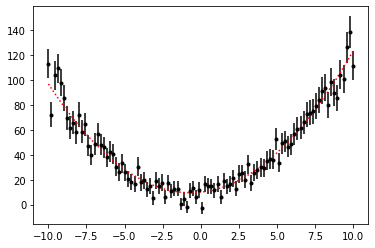

In [39]:
x = linspace(-10,10,100) # define our x
y = 10+x**2*s.norm(loc=1,scale=0.1).rvs(len(x))+s.norm(loc=0,scale=5).rvs(len(x))+1.3*x # and y
yerr = sqrt(y+25) # generate errors
plt.errorbar(x,y,yerr,fmt='k.') # plot random data
plt.plot(x,x**2+1.3*x+10,'r:') # and our model

So, the model in our case is not constant anymore, but some function linking x/y, i.e. polynomial f(x). So, instead of using single value for our $\chi^2$ calculation we now need to define this model as a function and use it instead of $\mu$:

In [40]:
model = lambda p,x: p[0]*x**2 + p[1]*x + p[2] # that's our model function
chi2 = lambda p: sum(((y-model(p,x))/yerr)**2) # and our chi2 function for this model which we have to minimize
p_best = scipy.optimize.fmin(chi2, [2,2,2]) # we can now minimize it and get best-fit parameter
chi_best = chi2(p_best)
print("best-fit result (input was [1, 1.3, 10]) %s with chi2 %s"%(p_best,chi_best))

Optimization terminated successfully.
         Current function value: 77.382234
         Iterations: 123
         Function evaluations: 222
best-fit result (input was [1, 1.3, 10]) [1.02875933 1.33051262 8.33793027] with chi2 77.38223389045908


Obviously, we can also make projection plots like before. Note, however, that now we have to re-minimize $\chi^2$ for each fixed value of the parameter of interest! Let's do that, for instance for coefficient around $x^2$. Note that this means that we need also to re-define our fitness function (i.e. introduce a function which would return best $\chi^2$ for fixed value of our first coefficient). The critical $\Delta\chi^2$ is calculated in the same way as before (we still have one free parameter in this plot). We could also repeat search for actual error for this estimate, but that would be the same as above, so I just leave it as a plot here

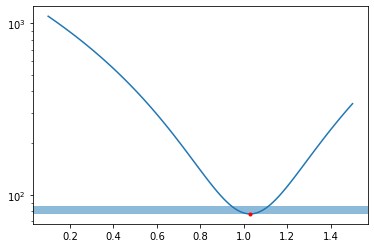

In [41]:
model = lambda p,first_coefficient: first_coefficient*x**2 + p[0]*x+p[1]
chi2 = lambda p,first_coefficient: sum(((y-model(p,first_coefficient))/yerr)**2)
chi2_best = lambda first_coefficient: scipy.optimize.fmin(lambda p: chi2(p,first_coefficient),[2,2],disp=False,full_output=True)[1]
trial_x2_coefficient = linspace(0.1,1.5,100)
bestchi_x2 = [chi2_best(x) for x in trial_x2_coefficient]
critical_delta_chi2 = s.chi2(1).isf(1.0-array(.997))

plt.semilogy(trial_x2_coefficient,bestchi_x2)
plt.plot([p_best[0]],[chi_best],'r.')
plt.axhspan(chi_best,chi_best+critical_delta_chi2,alpha=0.5)


More interesting is to ask what will happen when we're looking for simultaneous change of two parameters. For instance, coefficients before $x^2$ and $x$. Same approach can be used here, but instead of one-dimensional plot we will end up with 2d _contour_ plot. This means we need to evaluate our function on a grid (here done with two loops), and then plot it somehow. It makes sense to plot it with contours at values corresponding to 1,2,3$\sigma$ confidence or other common values (i.e. 90/99% or whatever you like). Obviously, critical $\Delta\chi^2$ needs to be calculated now for _two parameters of interest_. 

Text(0, 0.5, 'coefficient before $x^2$')

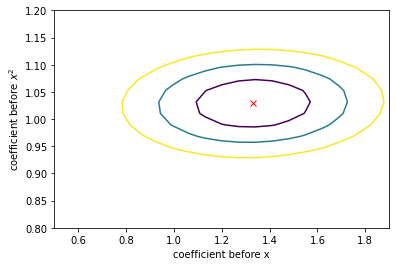

In [42]:
model = lambda p,first_coefficient,second_coefficient: first_coefficient*x**2 + second_coefficient*x+p[0]
chi2 = lambda p,first_coefficient,second_coefficient: sum(((y-model(p,first_coefficient,second_coefficient))/yerr)**2)
chi2_best = lambda first_coefficient,second_coefficient: scipy.optimize.fmin(lambda p: chi2(p,first_coefficient,second_coefficient),[10],disp=False,full_output=True)[1]
trial_x2_coefficient = linspace(0.8,1.2,20) # our trial values for x2 coefficient
trial_x1_coefficient = linspace(0.5,1.9,21) # and x1 coefficient

result = [] #inialize empty list for results, and loop over values
for x2c in trial_x2_coefficient:
    line = []
    for x1c in trial_x1_coefficient:
        line.append(chi2_best(x2c,x1c))
    result.append(line)

# Now we need to calculate critical delta chi
critical_prob = 1.0-2.0*(1.0-s.norm.cdf([1,2,3]))
critical_delta_chi2 = s.chi2(2).isf(1.0-array(critical_prob))
plt.contour(trial_x1_coefficient,trial_x2_coefficient,result,chi_best + array(critical_delta_chi2))
plt.plot([p_best[1]],[p_best[0]],'rx')
plt.xlabel('coefficient before x')
plt.ylabel('coefficient before $x^2$')
    



Obviously, you could calculate numerical estimates for your errors for both parameters by finding the boundary points in the error-ellipse corresponding to confidence level of interest. Be aware, however, that contours do not always look as smooth symmetric and regular as in the plot above, so in some cases specifying uncertainty for a parameter as a single number is not the best idea. 

Another ***very important point*** is that the confidence level location (and thus estimated parameter errors) are based on assumption that sum of residuals follows standard $\chi^2$ distribution, i.e. the **fit is good** in a sense that only random fluctuations remain and $\chi^2_{red}\simeq1$. If that is not the case, this assumption is not satisfied and thus critical $\Delta\chi^2$ values are ***meaningless***! It does not mean, of course, that you can not estimate confidence intervals for your parameters, but other methods must be used in this case.

Of course, there are dedicated tools to accomplish tasks like above (and more complex!) in a more simple and convinient way, both among python libraries, and dedicated applications. But this we will cover in due time. Now I'd like you to play a bit with the code above, trying to implement different model functions etc. It really helps to understand what goes on under the hood of more complex products.

## "Hidden variables" and error propagation
It is not always possible/feasible to measure the quantity of interest directly or even directly from the fit. You can be actually interested in an abstract quantity for which there's in principle no ruler available. Think, for instance, of measuring free-fall acceleration. From basic mechanics you know that $d=\frac{1}{2}gt^2$. You can measure distance (height) and fall time, but not $g$ directly. You can calculate it from the other two, but what will be your uncertainty if you have uncertainty for $d,t$? This question is addressed by _inferential statistics_. The crucial difference is that here you have not simply measurements, but also some model involved which connects your random variables (measurements)

For the case of acceleration mentioned above, the most trivial way to assess uncertainty is just to repeat your experiment many times, calculate $g$ for each realization and then apply your descriptive statistics methods to your result. Let's for now assume that $d=10$, i.e. we drop something from ten meters and just calculate time which it takes to reach the floor. Let's assume that you measure 100 times the time with accuracy of $\sim0.3$ s (average human reaction time). As a result you end-up with a table, and can apply your descriptive statistics methods to the time vector (make histograms, etc). You can also calculate $g=\frac{10}{0.5t^2}$, and apply descriptive statistics to that quantity. Btw, you can try to play with number of experiments here and see if increasing of this number always leads to improvement in $g$ value.

Text(0, 0.5, 'Number of experiments')

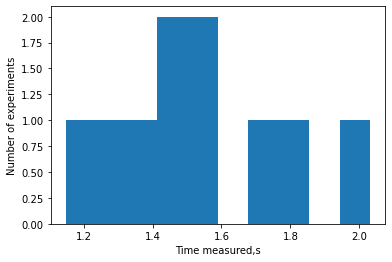

In [43]:
time = s.norm(loc=sqrt(10/0.5/9.8),scale=0.3).rvs(10)
g_calc = 10/0.5/time**2
tres = plt.hist(time)
plt.xlabel('Time measured,s')
plt.ylabel('Number of experiments')

So, our estimate of g=9.3+/-3.0


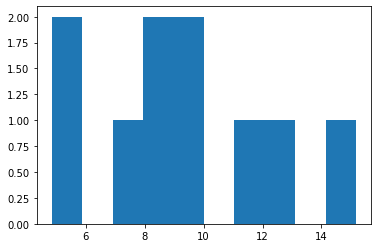

In [44]:
gres = plt.hist(g_calc)
print("So, our estimate of g=%.1f+/-%.1f"%(mean(g_calc),std(g_calc)))

Note that the histogram above does not appear _"normal"_, however, so actual estimate of uncertainty will be different. For one, it will be assymetric. This you can address by calculating percentiles over your calculated data:

In fact, our g is between 5.3 and 14, with the best guess at 9.3


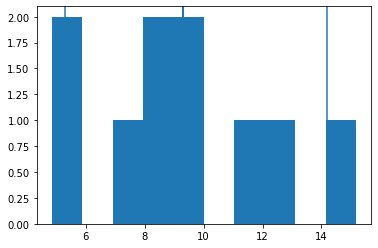

In [45]:
gres = plt.hist(g_calc)
glow = percentile(g_calc,5)
ghigh = percentile(g_calc,95)
plt.axvline(glow)
plt.axvline(ghigh)
plt.axvline(mean(g_calc),lw=2)
print("In fact, our g is between %.1f and %1.f, with the best guess at %.1f"%(glow,ghigh,mean(g_calc)))



For complex models (especially involving multiple variables) direct calculation is actually often the most feasible way to assess uncertainties. For simpler cases there's however, simpler way, i.e. _"error propagation"_. Indeed, we can visualize our calculation above by showing correspondence between measured and calculated points. Here the red curve shows the model connecting the variables.

(-3.0, 25.0)

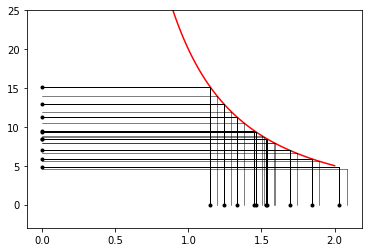

In [46]:
plt.plot(time,zeros_like(time),'k.')
plt.plot(zeros_like(time),g_calc,'k.')
plt.plot(linspace(0.5,2,100),10/0.5/linspace(0.5,2,100)**2,'r-')
[plt.plot([x,x],[0,10/0.5/x**2],'k-',lw=1) for x in time]
[plt.plot([x+0.05,x+0.05],[0,10/0.5/(x+0.05)**2],'k-',lw=0.5) for x in time]
[plt.plot([0,x],[10/0.5/x**2,10/0.5/x**2],'k-',lw=1) for x in time]
[plt.plot([0,x+0.05],[10/0.5/(x+0.05)**2,10/0.5/(x+0.05)**2],'k-',lw=0.5) for x in time]
plt.ylim(-3,25)

From the plot above you can see that the steeper the model curve, the further apart are calculated values (even if measured values are equaly close). That's natural, and opens a way to estimate uncertainty of the calculated variable even without directly applying descriptive statistics to sample, i.e. _propagate error_. The idea here is that model transforms uncertainty of the observed variable stretching or contracting it depending on how steep the curve connecting the two is. And whenever we talk about of steep/flat curve, we of course remember calculus and derivatives. For our model above, the slope of the curve is $(\frac{10}{0.5t^2})'=-40/x^3$, so any change in $t$ will be amplified by this factor for $g$, i.e. $\Delta g \propto \Delta x/x^3$. Or, in general case, $f_{k}\approx f_{k}^{0}+\sum _{i}^{n}{\frac  {\partial f_{k}}{\partial {x_{i}}}}x_{i}$. If you consider uncertainty as a small perturbation to your variable, you can immideately get (in genral case)

$${\displaystyle s_{f}={\sqrt {\left({\frac {\partial f}{\partial x}}\right)^{2}s_{x}^{2}+\left({\frac {\partial f}{\partial y}}\right)^{2}s_{y}^{2}+\left({\frac {\partial f}{\partial z}}\right)^{2}s_{z}^{2}+\cdots }}}$$

there are many examples of calculation on corresponding [Wikipedia page](https://en.wikipedia.org/wiki/Propagation_of_uncertainty) (basically all simple cases are covered), so please refer to there if in trouble. For more complex cases simple error propagation may be inadequate, and then methods like MCMC or projection (see above) must be used.
